# "Free-lunch" of Diversification

Imports and set magics:

In [1]:
#%pip install matplotlib-venn
#%pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# We import the StockData class from the dataproject module
from dataproject import StockData

We want to begin with examining the expected daily returns. Therefore, we need to begin by calculating them. We utilize the adjusted closing price for each day in our calculations. We present the results in both table and figure formats to identify any unexpected outcomes and to gain an understanding of the volatility of the daily returns throughout the 2017-2014 time period.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,102.807134,103.929729,101.754317,102.896632,101.007878,1.058799e+08,0.001185
std,54.805248,55.376861,54.256942,54.845197,55.187181,5.365632e+07,0.018777
min,28.950001,29.082500,28.690001,29.004999,26.922541,2.404830e+07,-0.128647
25%,46.929376,47.290626,46.503751,46.973749,44.730833,7.077085e+07,-0.007559
50%,110.451248,112.320000,108.813751,110.389999,108.002926,9.216420e+07,0.000894
75%,151.190002,153.287498,149.927498,151.339996,149.929211,1.261926e+08,0.010544
max,198.020004,199.619995,197.000000,198.110001,197.589523,4.479400e+08,0.119808


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,124.208224,125.420143,122.937248,124.182253,108.118283,8.634918e+06,0.000536
std,26.894823,27.082769,26.688267,26.912746,31.406659,4.630659e+06,0.019802
min,55.259998,58.490002,51.599998,54.220001,45.317299,1.640100e+06,-0.221248
25%,106.949997,107.762497,105.987499,106.847498,86.738297,5.806175e+06,-0.007709
50%,118.355000,119.255001,117.439999,118.274998,96.132313,7.521250e+06,0.000738
75%,148.097504,149.277496,145.804996,147.580006,143.261757,1.012775e+07,0.008751
max,187.119995,189.679993,186.179993,188.050003,178.740128,5.723100e+07,0.227407


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,52.584452,52.944232,52.204364,52.576365,47.317077,1.419623e+07,0.000396
std,6.843534,6.883937,6.794504,6.849499,8.971716,6.391772e+06,0.011990
min,38.759998,38.889999,36.270000,37.560001,32.094234,2.996300e+06,-0.096725
25%,46.107500,46.367499,45.860001,46.080002,38.771410,1.025770e+07,-0.004733
50%,53.020000,53.395000,52.565001,53.025000,46.784449,1.288415e+07,0.000692
75%,59.250000,59.650000,58.770000,59.237499,56.848194,1.606878e+07,0.005969
max,67.000000,67.199997,65.720001,66.209999,62.319378,6.784570e+07,0.064795


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,149.169995,150.257588,148.043805,149.182242,135.942377,7.726653e+06,0.000336
std,17.068344,17.169888,16.975243,17.077461,21.952289,6.861142e+06,0.011975
min,111.930000,112.800003,109.160004,111.139999,91.930855,2.114900e+06,-0.100379
25%,134.005005,134.935001,132.727501,133.937496,115.937920,5.449450e+06,-0.005004
50%,148.455002,149.465004,147.059998,148.284996,133.900063,6.558650e+06,0.000283
75%,163.702499,164.842499,162.482498,163.612499,156.653683,8.211125e+06,0.006020
max,185.100006,186.690002,184.179993,186.009995,175.705063,1.513195e+08,0.079977


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,31.253618,31.598169,30.907056,31.252812,28.703716,5.827184e+07,0.000574
std,6.209880,6.257163,6.154673,6.201696,6.404639,2.590219e+07,0.020358
min,19.260000,19.670000,17.950001,18.080000,16.361561,1.380540e+07,-0.153973
25%,27.090000,27.402500,26.737500,27.007500,24.238400,4.097392e+07,-0.009170
50%,29.990000,30.240000,29.660000,29.980000,27.200106,5.151200e+07,0.000352
75%,34.412499,34.812501,34.080000,34.470001,32.972404,6.808665e+07,0.010360
max,49.910000,50.110001,49.029999,49.380001,46.471878,2.595458e+08,0.177962


,Open,High,Low,Close,Adj Close,Volume,Daily Return
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1.824000e+03,1823.000000
mean,100.278355,101.313048,99.234095,100.279375,96.837207,7.571193e+06,0.000536
std,31.067600,31.354797,30.714940,31.012852,31.058225,4.199420e+06,0.019503
min,50.799999,51.070000,50.349998,50.830002,47.433571,1.821900e+06,-0.128081
25%,77.355000,78.009998,76.199997,77.155003,72.749048,5.251575e+06,-0.008544
50%,98.500000,99.545002,97.720001,98.615002,95.724358,6.578750e+06,0.000364
75%,122.610001,124.085001,120.985003,122.392500,120.247231,8.558225e+06,0.010320
max,176.350006,179.100006,175.500000,177.509995,172.454758,4.817610e+07,0.155314


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


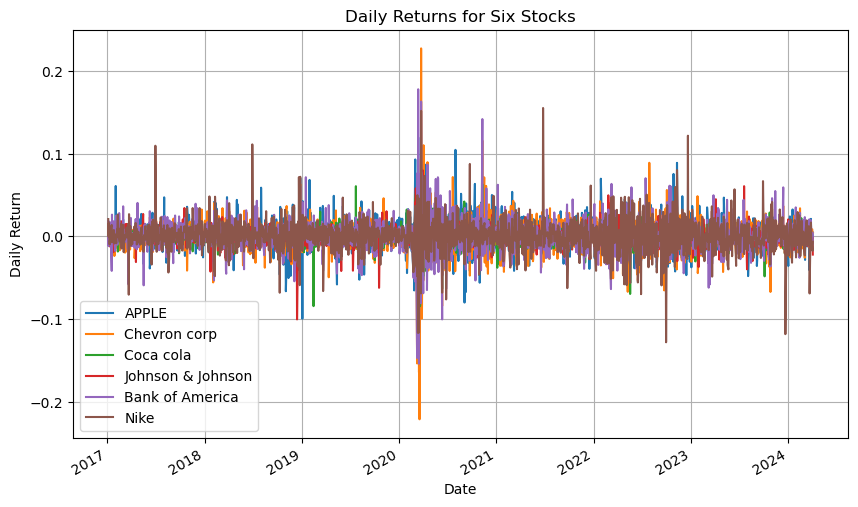

In [3]:
# We create an instance of the StockData class
SD = StockData(['AAPL', 'CVX', 'KO', 'JNJ', 'BAC', 'NKE'], 2017, 2024)

# We are calling this method to calculate daily returns and get the DataFrame
df = SD.six_stocks_()

# We will plot the DataFrame
df.plot(figsize=(10, 6))
plt.title('Daily Returns for Six Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')

# We are setting legend labels to ticker symbols
plt.legend(['APPLE', 'Chevron corp', 'Coca cola', 'Johnson & Johnson', 'Bank of America', 'Nike'])

plt.grid(True)
plt.show()

We start by having to solve the minimum variance problem, which is a fundamental concept in portfolio optimization, aiming to find the portfolio with the lowest possible level of risk for a given expected return or the highest expected return for a given level of risk.
Therefore we start by finding the expected returns for each stock in the portfolio. These expected returns represent the average returns that investors anticipate earning from holding each stock over the chosen time period.

Additionally, we calculate the covariance matrix. The covariance measures the degree to which the returns of two stocks move together. A positive covariance indicates that the returns move in the same direction, while a negative covariance indicates they move in opposite directions. The covariance matrix gives us the first sign of whether or not we have benefits from diversifying our portfolio by adding or removing stocks from the portfolio.


In [4]:
# We will set the display precision to 15 decimal points
pd.set_option('display.float_format', '{:.15f}'.format)

# We will call the method to get the filtered DataFrame
expected_returns_df_filtered = SD.expected_return_()

# We are displaying the filtered DataFrame containing the expected returns with company names
display(expected_returns_df_filtered)


,Expected Return (%)
Ticker,
Apple Inc.,0.118517548412271
Chevron Corporation,0.053565246224802
The Coca-Cola Company,0.039587021263045
Johnson & Johnson,0.033614193231775
Bank of America Corporation,0.057441816706076
"Nike, Inc.",0.053610262620595


From the table above we can see that Apple Inc. is the asset in our portfolio that gives us the highest expected daily return of 0,118%, and that the pharmaceutical company Johnson & Johnson gives us the lowest of 0,033%.

In [5]:
# This is the code to where we display the covariance matrix for each portfolio
print("Covariance Matrix for Two Stocks:")
display(SD.calculate_covariance("two"))

print("Covariance Matrix for Four Stocks:")
display(SD.calculate_covariance("four"))

print("Covariance Matrix for Six Stocks:")
display(SD.calculate_covariance("six"))


Covariance Matrix for Two Stocks:


,AAPL,CVX
AAPL,0.000352568137251,0.000127784730952
CVX,0.000127784730952,0.000392115115979


Covariance Matrix for Four Stocks:


,AAPL,CVX,KO,JNJ
AAPL,0.000352568137251,0.000127784730952,0.000087696080940,0.000083040261513
CVX,0.000127784730952,0.000392115115979,0.000099501928660,0.000084511591046
KO,0.000087696080940,0.000099501928660,0.000143752674278,0.000075451300511
JNJ,0.000083040261513,0.000084511591046,0.000075451300511,0.000143389854252


Covariance Matrix for Six Stocks:


,AAPL,CVX,KO,JNJ,BAC,NKE
AAPL,0.000352568137251,0.000127784730952,0.000087696080940,0.000083040261513,0.000165280514254,0.000177928565035
CVX,0.000127784730952,0.000392115115979,0.000099501928660,0.000084511591046,0.000245200791107,0.000142291654736
KO,0.000087696080940,0.000099501928660,0.000143752674278,0.000075451300511,0.000111106112871,0.000093978119054
JNJ,0.000083040261513,0.000084511591046,0.000075451300511,0.000143389854252,0.000090695668587,0.000075580538526
BAC,0.000165280514254,0.000245200791107,0.000111106112871,0.000090695668587,0.000414457643601,0.000182307849128
NKE,0.000177928565035,0.000142291654736,0.000093978119054,0.000075580538526,0.000182307849128,0.000380371912184


For the covariance matrix for the two stocks portfolio we see a covariance between Apple and Chevron Corporation of 0.000127, which means that there is a positive covariance between the returns of the two assets. It tells us that the two stocks tend to move in the same direction but we notice the very small number. Hence there is some level of correlation (but very weak) between the two stocks and their expected return, meaning that if Apple's return is above its average then Chevron Corporation's is also likely to be above its average and vice versa. 

In portfolio management the interpretation would be that a low covariance indicates that the assets are less likely to move in tandem, potentially providing greater diversification benefits and reducing overall portfolio risk.


Next, we need to find the inverse matrices of the covariance matrices found above, create a 1-vector and a z-vector to be able to solve the minimum variance problem. We are seeking the portfolio weights with the smallest possible variance for each of the three portfolios we are working with. 


In [6]:
# This code displays the inverse covariance matrix for each portfolio
print("Invers Covariance Matrix for Two Stocks:")
display(SD.calculate_invers_covariance("two"))

print("Invers Covariance Matrix for Four Stocks:")
display(SD.calculate_invers_covariance("four"))

print("Invers Covariance Matrix for Six Stocks:")
display(SD.calculate_invers_covariance("six"))


Invers Covariance Matrix for Two Stocks:
Number: two


,AAPL,CVX
AAPL,3216.210590409072211,-1048.117219239723454
CVX,-1048.117219239723454,2891.837959461275204


Invers Covariance Matrix for Four Stocks:
Number: four


,AAPL,CVX,KO,JNJ
AAPL,3623.042727349791221,-642.830060324054216,-1192.109701795934825,-1092.027032500287760
CVX,-642.830060324054330,3306.915312899586752,-1477.186686625580478,-799.472474695035430
KO,-1192.109701795934825,-1477.186686625580478,10896.122965710233984,-4172.499880626786762
JNJ,-1092.027032500287760,-799.472474695035544,-4172.499880626785853,10273.163685517076374


Invers Covariance Matrix for Six Stocks:
Number: six


,AAPL,CVX,KO,JNJ,BAC,NKE
AAPL,4213.468331589728223,-131.449190539899291,-649.708419121772181,-934.835028493266122,-672.537938597496009,-1253.167178915980230
CVX,-131.449190539899405,4289.523095049436961,-856.034484145753481,-595.872919813881140,-2017.025691290631357,-246.522543119346579
KO,-649.708419121772067,-856.034484145753936,11436.859741814394511,-4009.175412982657235,-1020.175047892377393,-915.958170978686326
JNJ,-934.835028493265895,-595.872919813881367,-4009.175412982656781,10323.444072461050382,-358.344592038015946,-228.792044384903733
BAC,-672.537938597495895,-2017.025691290630675,-1020.175047892377279,-358.344592038015605,4579.121677720672778,-802.325753376969828
NKE,-1253.167178915980003,-246.522543119346864,-915.958170978686326,-228.792044384903733,-802.325753376969601,3963.738710858297509


In [7]:
# This code displays the one-vector belonging to each portfolio
display(SD.one_vector("two"))
display(SD.one_vector("four"))
display(SD.one_vector("six"))

array([[1.],
       [1.]])

array([[1.],
       [1.],
       [1.],
       [1.]])

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [8]:
# This code displays the z-vector belonging to each portfolio
display(SD.calculate_z_vector("two"))
display(SD.calculate_z_vector("four"))
display(SD.calculate_z_vector("six"))

Number: two


array([[2168.09337117],
       [1843.72074022]])

Number: four


array([[ 696.07593273],
       [ 387.42609125],
       [4054.32669666],
       [4209.16429769]])

Number: six


array([[ 571.77057592],
       [ 442.61826614],
       [3985.80820669],
       [4196.42407475],
       [-291.28734547],
       [ 516.97302008]])

In [9]:
# We again set the display to 15 decimal points
pd.set_option('display.float_format', '{:.15f}'.format)

# We get the weights
weights_two = SD.normalize_z_vector("two")
weights_four = SD.normalize_z_vector("four")
weights_six = SD.normalize_z_vector("six")

# We create DataFrames with the weights and the stock names as the index
df_two = pd.DataFrame(weights_two, index=SD.tickers[:2], columns=["Weights of each stock"])
df_four = pd.DataFrame(weights_four, index=SD.tickers[:4], columns=["Weights of each stock"])
df_six = pd.DataFrame(weights_six, index=SD.tickers[:6], columns=["Weights of each stock"])

# We will display the DataFrames
display(df_two)
display(df_four)
display(df_six)

SD.create_pert(expected_returns_df_filtered, df_two, df_four, df_six)


Number: two
Number: four
Number: six


,Weights of each stock
AAPL,0.540427176078123
CVX,0.459572823921877


,Weights of each stock
AAPL,0.074470573730356
CVX,0.041449275771864
KO,0.433757325880767
JNJ,0.450322824617013


,Weights of each stock
AAPL,0.060682653215663
CVX,0.046975573564288
KO,0.423018300305454
JNJ,0.445371198865010
BAC,-0.030914653037326
NKE,0.054866927086910


In [10]:
# This is the code where we check our results, to see if the calculations are correct
display(SD.check_results("two"))
display(SD.check_results("four"))
display(SD.check_results("six"))

Number: two


array([[1.],
       [1.]])

Number: four


array([[1.],
       [1.],
       [1.],
       [1.]])

Number: six


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

Above we have found the portfolio weights for respectively the two stock, four stock and six stock portfolio and further checked if they sum to one.
For example, for the two stock portfolio, it should consist of 54% Apple stocks and 46% Chevron Corporation stocks to get the smallest possible variance for a portfolio consisting of only these two stocks. 
Interestingly, we observe for the six-stock portfolio a negative weight assigned to Bank of America (-0.03). This negative weight suggests that the optimal portfolio allocation involves short-selling Bank of America stock. 


Now that we have determined the portfolio weights that minimize the portfolio variance, we are interested in estimating the expected daily return associated with these portfolio weights for each of the three portfolios. 
Additionally, we seek to assess the level of risk inherent in the portfolios represented by these weights. To accomplish this, we calculate the standard deviation of the variance, which serves as a measure of volatility. 


In [11]:
# This code displays the expected return for each portfolio
print("Expected return for two stock portfolio:")
display(SD.portfolio_expected_return_two)
print("Expected return for four stock portfolio:")
display(SD.portfolio_expected_return_four)
print("Expected return for six stock portfolio:")
display(SD.portfolio_expected_return_six)


Expected return for two stock portfolio:


0.08866723547574856

Expected return for four stock portfolio:


0.04335470941593511

Expected return for six stock portfolio:


0.042590681979171936

In [12]:
# We need to call an instance of the StockData class to calculate the portfolio variances
SD.calculate_portfolio_variances()

# We print the portfolio variances
print("Portfolio variance for two stock portfolio:", SD.portfolio_variance_two)
print("Portfolio variance for four stock portfolio:", SD.portfolio_variance_four)
print("Portfolio variance for six stock portfolio:", SD.portfolio_variance_six)

Portfolio variance for two stock portfolio: 0.00024926379244757653
Portfolio variance for four stock portfolio: 0.00010698627869280841
Portfolio variance for six stock portfolio: 0.00010613112281597059


In [13]:
# We need to call an instance of the StockData class to calculate the portfolio standard deviations
SD.calculate_portfolio_std_devs()

# We print the portfolio standard deviations
print("Portfolio standard deviation for two stock portfolio:", SD.portfolio_std_dev_two)
print("Portfolio standard deviation for four stock portfolio:", SD.portfolio_std_dev_four)
print("Portfolio standard deviation for six stock portfolio:", SD.portfolio_std_dev_six)

Portfolio standard deviation for two stock portfolio: 0.015788090209001737
Portfolio standard deviation for four stock portfolio: 0.010343417167107223
Portfolio standard deviation for six stock portfolio: 0.010301996059792033


Our results show that diversification leads to a decrease in expected daily return, which is not fully in accordance with Harry Markowitz's theory. Notably, the two-stock portfolio outperforms the four and six-stock portfolios in terms of expected daily return. On the other hand our results are in accordance with Markowitz in regards to diversification (inclusion of more assets) reduces your risk, because the standard deviation for the four stock and six stock portfolio both are lower than for the two stock portfolio.

Finally, we want to plot the efficient frontier for each of the three portfolios showing the portfolio with the optimal portfolio weights (red dot) and the different levels of volatility and expected return if you chose different portfolio weights than the ones we found to be the optimal ones solving the minimum variance problem. 

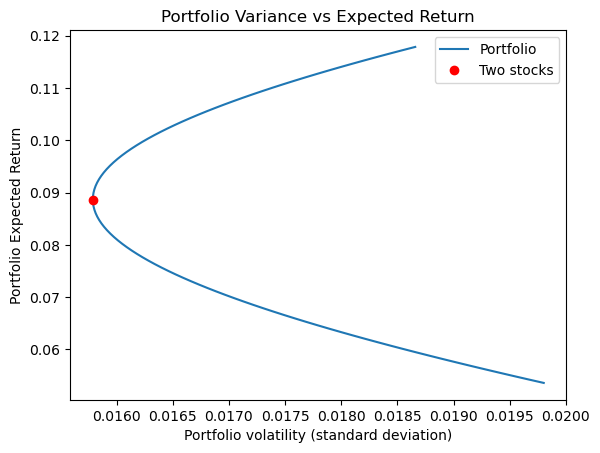

In [14]:
SD.plot_two_stock()

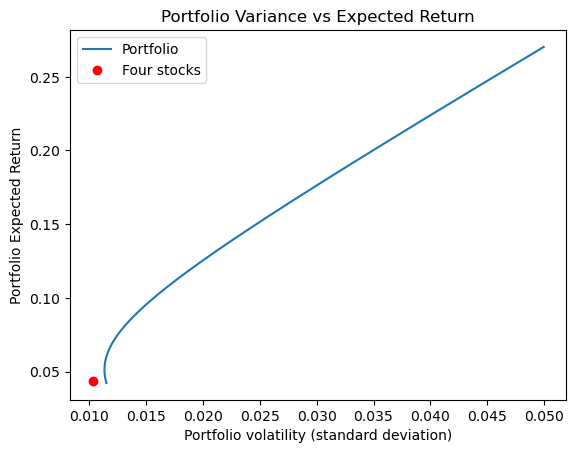

In [15]:
SD.plot_four_stock()

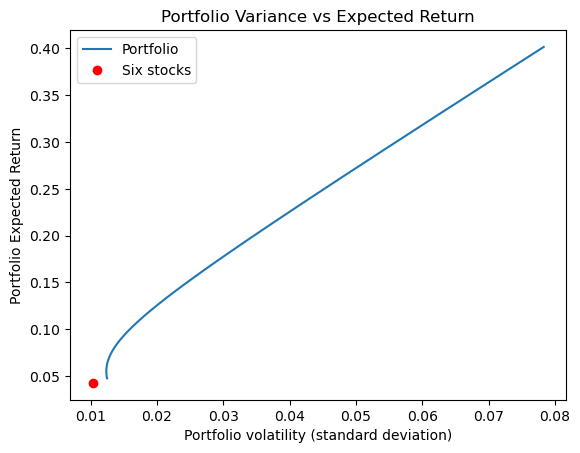

In [16]:
SD.plot_six_stock()

# Conclusion

After reviewing our findings, it appears that Harry Markowitz theory holds in terms of risk reduction. However, our project's results indicate a decline in the expected return when comparing a two-stock portfolio to a six-stock portfolio. Nonetheless, we believe that if we were to include even more stocks, say 30, the outcomes would further support his theory. We anticipate that the expected daily returns would converge towards or even exceed those of the two-stock portfolio while concurrently mitigating risk.